# Лабораторная работа №2

Описание

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Для начала импортируем все библиотеки и считываем файл с датасетом. При этом сталкиваемся с проблемой - pandas всё видит как одну колонку. В нашем случае разделители у датасета не стандартная запятая, а табуляция, поэтому чтобы pandas считал всё правильно мы дописываем параметр sep='\t' при чтении файла.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
data.info()

In [5]:
data.groupby('locality_name')['is_apartment'].mean().sort_values(ascending=False).head(10)


locality_name
деревня Нижняя          1.0
Зеленогорск            0.25
посёлок Щеглово        0.25
Выборг              0.09375
Красное Село       0.047619
Никольское         0.045455
Петергоф           0.041667
Всеволожск         0.022727
Колпино            0.022727
Санкт-Петербург    0.021277
Name: is_apartment, dtype: object

In [6]:
data.groupby('is_apartment')[['floors_total', 'floor', 'ceiling_height', 'cityCenters_nearest']].mean()

,floors_total,floor,ceiling_height,cityCenters_nearest
is_apartment,,,,
False,10.737248,5.976147,2.873812,14208.418726
True,6.900000,4.480000,6.313864,14851.000000


In [11]:
import os
print(os.listdir())

['.git', '.venv', 'lab2.ipynb', 'real_estate_data.csv']


<Axes: xlabel='is_apartment', ylabel='floors_total'>

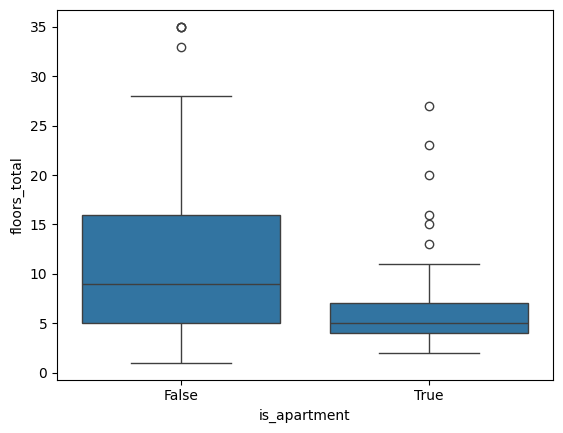

In [5]:
import seaborn as sns
sns.boxplot(x='is_apartment', y='floors_total', data=data)

Начнём с пропусков в is_apartment.

In [2]:
data['is_apartment'].value_counts(dropna=False)

is_apartment
NaN      20924
False     2725
True        50
Name: count, dtype: int64

In [ ]:
data[data['is_apartment'].isna()][''].value_counts()


In [6]:
data['is_apartment_num'] = data['is_apartment'].map({True: 1, False: 0})
data.corr(numeric_only=True)['is_apartment_num'].sort_values(ascending=False)

is_apartment_num       1.000000
ceiling_height         0.179328
kitchen_area           0.134304
balcony                0.092878
total_area             0.088458
last_price             0.079716
living_area            0.077800
ponds_around3000       0.062462
parks_around3000       0.058156
airports_nearest       0.050980
total_images           0.046687
days_exposition        0.020628
ponds_nearest          0.019008
cityCenters_nearest    0.010037
rooms                 -0.000860
open_plan             -0.006812
studio                -0.009986
floor                 -0.040646
floors_total          -0.078057
parks_nearest         -0.097669
Name: is_apartment_num, dtype: float64

In [7]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
is_apartment_num        20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
rooms                       0
last_price                  0
total_area                  0
total_images                0
open_plan                   0
floor                       0
studio                      0
dtype: int64

In [15]:
mask = data['is_apartment'].isna()
data[mask].isna().mean().sort_values(ascending=False).head(23)

is_apartment            1.000000
is_apartment_num        1.000000
parks_nearest           0.659147
ponds_nearest           0.616039
balcony                 0.527719
ceiling_height          0.395813
airports_nearest        0.234707
cityCenters_nearest     0.233751
parks_around3000        0.233703
ponds_around3000        0.233703
days_exposition         0.138884
kitchen_area            0.099790
living_area             0.085213
floors_total            0.004110
locality_name           0.001625
first_day_exposition    0.000000
rooms                   0.000000
last_price              0.000000
total_area              0.000000
total_images            0.000000
open_plan               0.000000
floor                   0.000000
studio                  0.000000
dtype: float64

In [14]:
null_corr = data.isna().corr()
null_corr['is_apartment'].sort_values(ascending=False).head(23)

is_apartment            1.000000
is_apartment_num        1.000000
balcony                 0.228909
living_area             0.049657
ceiling_height          0.044080
days_exposition         0.037525
kitchen_area            0.034166
floors_total            0.021978
cityCenters_nearest     0.005663
ponds_around3000        0.005627
parks_around3000        0.005627
airports_nearest        0.005560
ponds_nearest           0.002503
parks_nearest           0.000277
locality_name          -0.026760
total_images                 NaN
last_price                   NaN
total_area                   NaN
first_day_exposition         NaN
rooms                        NaN
floor                        NaN
studio                       NaN
open_plan                    NaN
Name: is_apartment, dtype: float64

Исходя из анализа нельзя точно сказать, что конкретно должно быть на месте пропусков is_apartment, поэтому заполнять столь большое число пропусков значением False остаётся под вопросом.

Далее перейдём к анализу пропусков у столбца ceiling_height.

In [16]:
data['ceiling_height'].value_counts(dropna=False)

ceiling_height
NaN       9195
2.50      3515
2.60      1646
2.70      1574
3.00      1112
          ... 
3.48         1
10.30        1
1.00         1
100.00       1
3.59         1
Name: count, Length: 184, dtype: int64

Значения данного столбца заполняются пользователем, поэтому отсутствие значения в нём может говорить о том, что пользователь либо забыл указать, либо не знает точного значения.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
import matplotlib as plt

plt.

### Обработка пропусков

Можно заметить, что в датасете есть пропуски в столбцах: ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 

Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски допустимо заменить на 0.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
# data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Теперь проанализируем информацию о близлежащих объектах. 

Аналогичным способом стоит заменить пропуски в ponds_around3000, более того, по итогу, во всех строках , где ponds_around3000 равен 0, столбец ponds_nearest содержит пропуск, что логично. Естественно, в ponds_nearest пропуски заменять на что либо нет смысла, т.к. расстояния до пруда буквально нет, если его рядом нет.

In [ ]:
data['ponds_around3000'].value_counts(dropna=False)

In [ ]:
data[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna())]

In [ ]:
data['ponds_nearest'].min()

np.float64(13.0)

Также мы поступим и с парками. Единственное отличие между парками и прудами в том, что у парков количество нулей и NaN не совпадает у колонок — у parks_nearest меньше "NaN", чем нулей у parks_around3000 на 4. Произошло это из-за того, что у parks_nearest есть 4 значения, которые больше 3000 метров, поэтому они соответствуют нулю в столбце parks_around3000.

In [ ]:
mask = data['parks_nearest'].isna()  # строки, где parks_nearest == NaN
data.loc[mask, 'parks_around3000'] = data.loc[mask, 'parks_around3000'].fillna(0)

In [ ]:
data['parks_nearest'].value_counts(dropna=False)

In [ ]:
data['parks_around3000'].value_counts(dropna=False)

In [ ]:
data[data['parks_nearest'] > 3000]

У столбцов ceiling_height, living_area, kitchen_area, days_exposition никак заполнить пропуски не выйдет, т.к. не на что ориентироваться при выборе значений.

In [ ]:
data['floors_total'].value_counts(dropna=False)

np.float64(1.0)

Со столбцом is_apartment всё страннее, но пусть будет пока так:

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\mystr\AppData\Local\Temp\ipykernel_21904\2052809825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   